In [1]:
%matplotlib inline
import bs4
import requests
import matplotlib.pyplot as plt

In [4]:
raw = requests.get('http://rating.chgk.info/teams.php')
soup = bs4.BeautifulSoup(raw.content, 'html.parser')

In [6]:
def find_q(soup):
    span = soup.find('span', string='Q')
    parent = span.find_parent().text
    return float(parent[28:38])

In [8]:
def q_for_release(release_id):
    if int(release_id) % 10 == 0:
        print(f'Getting q for release {release_id}')
    raw = requests.get(f'http://rating.chgk.info/teams.php?release={release_id}')
    soup = bs4.BeautifulSoup(raw.content, 'html.parser')
    return find_q(soup)

In [10]:
def list_releases():
    raw = requests.get(f'http://rating.chgk.info/teams.php')
    print('Got recent releases')
    soup = bs4.BeautifulSoup(raw.content, 'html.parser')
    options = soup.select('option')
    recent = [(o['value'], o.text.strip())
              for o in options
              if '2016' in o.text or '2015' in o.text or '2017' in o.text]
    print(f'Prepared {len(recent)} releases')
    return recent


In [12]:
qs = [(r[0], r[1], q_for_release(r[0])) for r in list_releases()]
qs[:5]

Got recent releases


Prepared 156 releases


Getting q for release 1140


Getting q for release 1150


Getting q for release 1160


Getting q for release 1180


Getting q for release 1190


Getting q for release 1210


Getting q for release 1220


Getting q for release 1230


Getting q for release 1240


Getting q for release 1250


Getting q for release 1270


Getting q for release 1280


Getting q for release 1290


Getting q for release 1300


Getting q for release 1310


[('1132', '1 января 2015', 0.21121028),
 ('1133', '8 января 2015', 0.21270629),
 ('1134', '15 января 2015', 0.2124622),
 ('1135', '22 января 2015', 0.21153891),
 ('1137', '29 января 2015', 0.21026931)]

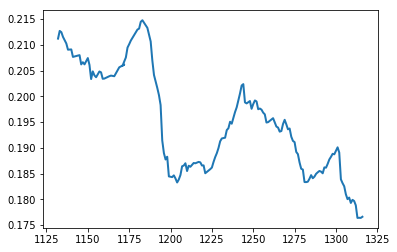

In [14]:
ids = [q[0] for q in qs]
q_values = [q[2] for q in qs]
plt.plot(ids, q_values, linewidth=2)

In [16]:
max(qs, key=lambda q: q[2])

('1183', '28 августа 2015', 0.21477952)

In [17]:
min(qs, key=lambda q: q[2])

('1313', '9 ноября 2017', 0.17639606)